In [73]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [74]:
model = keras.models.load_model('../models/date-expired/inception_resnetv2_64_10.h5')

In [75]:
import pathlib
test_dir = "../data/"

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    shuffle=True,
    # batch_size=32,
    image_size=(160, 160),
)

Found 15 files belonging to 1 classes.


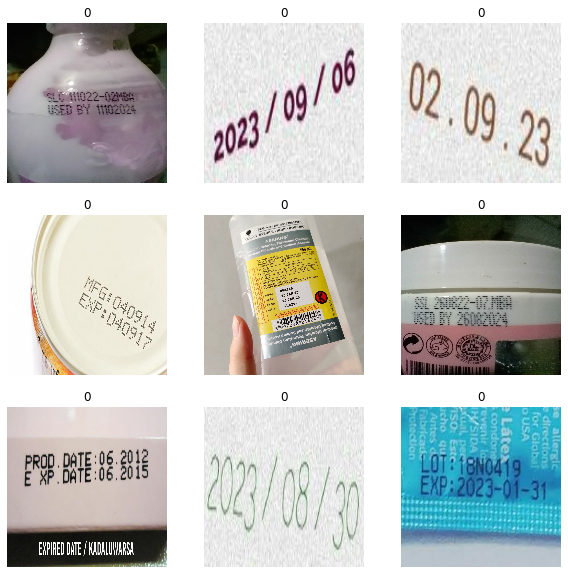

In [76]:
# visualize the data

from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [77]:
preprocessing_input = tf.keras.applications.inception_resnet_v2.preprocess_input

In [78]:
# create label
from datetime import datetime, timedelta
from collections import OrderedDict

def gen_date(start, end):
    date_generated = [start + timedelta(days=x) for x in range(0, (end-start).days)]
    return date_generated


def parse_date(delimiter, base_format):
    dates = []
    for i in delimiter:
        date = base_format.replace("-", i)
        dates.append(date)
    return dates


def date_gen_format(date, format):
    try:
        date = datetime.strftime(date, format)
        return date
    except ValueError:
        pass

In [79]:
labels = []

delimiter = ("", " ", "-", " - ", "/", " / ", ".", " . ")

base_format = ["%d-%m-%y", "%d-%m-%Y", "%Y-%m-%d"]

start = datetime(2022, 10, 1)
end = datetime(2025, 12, 31)

x = 1
for date in gen_date(start, end):
    for i in base_format:
        # for j in parse_date(delimiter, i):
        labels.append(date_gen_format(date, j))
    x += 1

month = list(OrderedDict(((start + timedelta(_)).strftime(r"%b%y"), None) for _ in range((end - start).days)).keys())
for i in month:
    labels.append(i)
    x += 1
        

In [80]:
print(len(labels))
# print(labels[:100])

3600


In [81]:
predictions = model.predict(test_ds)


1/1 [==============================] - 8s 8s/step


In [82]:
for i in predictions:
    print(labels[np.argmax(i)])
    

2025 . 02 . 25
2025 . 02 . 25
2024 . 12 . 23
2022 . 10 . 02
2025 . 02 . 25
2024 . 07 . 23
2025 . 02 . 25
2025 . 02 . 25
2022 . 10 . 10
2025 . 02 . 25
2025 . 02 . 25
2025 . 02 . 25
2025 . 02 . 25
2025 . 02 . 25
2022 . 10 . 05


1/1 [==============================] - 0s 278ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction: ('2025 . 02 . 25', 0.07547177956439555)


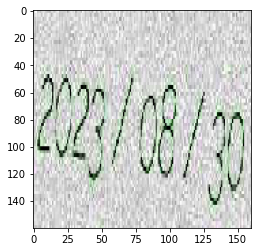

In [116]:
# prediction one image
image_path = "../data/testExp/12.jpg"

img = keras.preprocessing.image.load_img(image_path, target_size=(160, 160))

img = tf.keras.preprocessing.image.img_to_array(img)
img_arr = np.expand_dims(img, 0)
img_arr = preprocessing_input(img_arr)
pred = model.predict(img_arr)
score = tf.nn.softmax(pred[0])
print(f"prediction: {labels[np.argmax(score)], 100 * np.max(score)}")
plt.imshow(img)

1/1 [==============================] - 0s 245ms/step


FileNotFoundError: [Errno 2] No such file or directory: '../data/testExp/14.jpg'

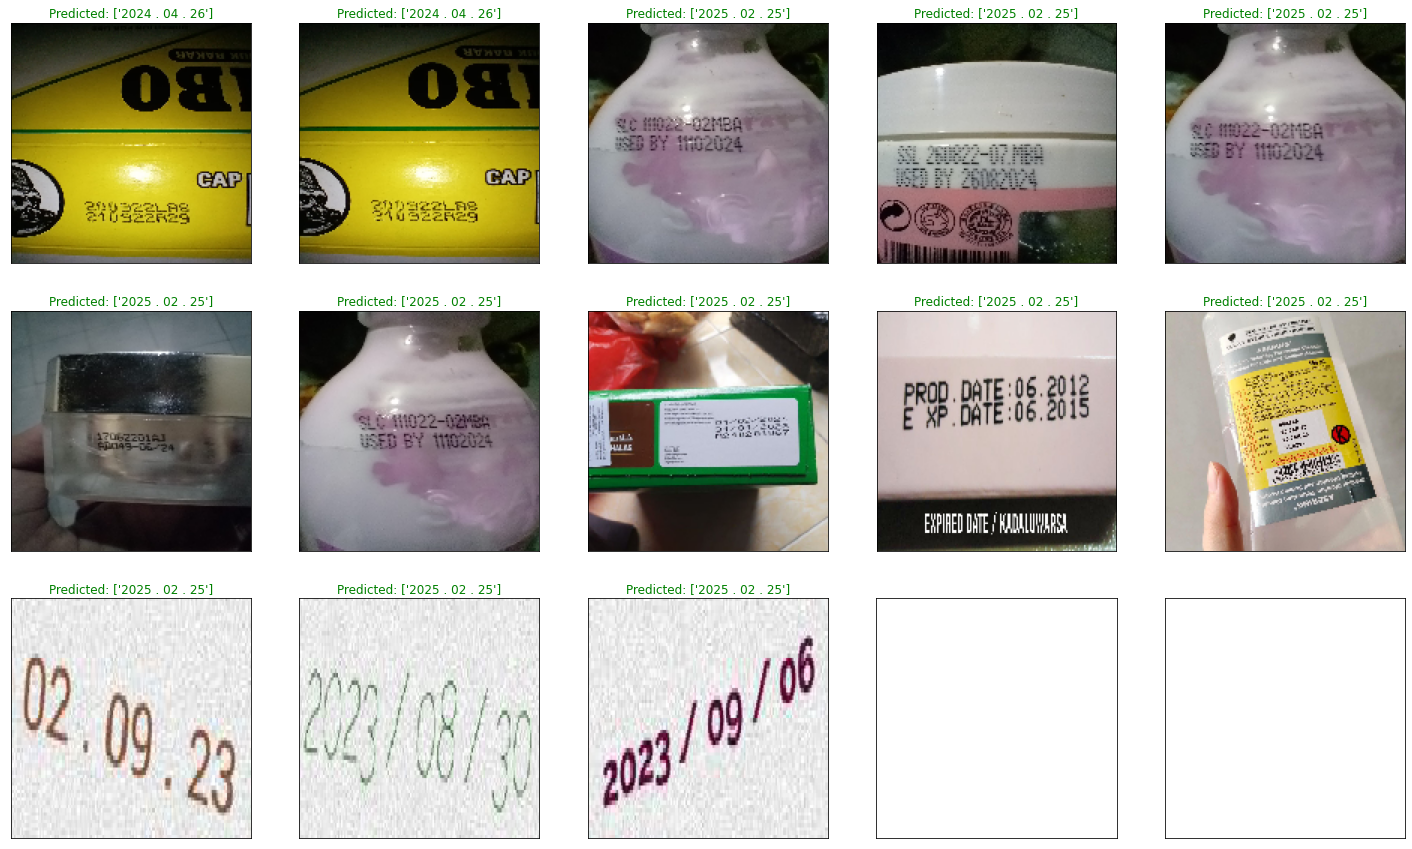

In [107]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img

random_index = np.random.randint(1, 10,11)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img = load_img(test_dir+"testExp/"+str(i+1)+'.jpg', target_size=(160, 160))
    ax.imshow(img)
    img = image.img_to_array(img)
    img_arr = np.expand_dims(img, 0)
    img_arr = preprocessing_input(img_arr)
    pred = model.predict(img_arr)
    
    pred = np.argmax(pred,axis=1)

    # Map the label
    # labels = (train_dataset.class_indices)
    # labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]

    ax.set_title(f"Predicted: {pred}", color='green')
plt.show()


In [88]:
loss, acc = model.evaluate(i)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

1/1 [==============================] - 9s 9s/step - loss: 4960851.5000 - accuracy: 0.0000e+00
Restored model, accuracy:  0.00%
